<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1w5HIG2LsuVnhhuEYfRvpBn4hHziWj_wW" width = "300" align="center"/>

El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_09/data/BC.csv", sep=",")
df = df.set_index('id')
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0}) # target
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:

1. Realice un análisis exploratorio del conjunto de datos.

In [3]:
# Tamaño del dataset:
df.shape

(569, 31)

In [4]:
# Información del dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

**Comentario:** Se observa que todas las variables son numéricas y que no se presentan datos nulos.

In [5]:
# Descripción de los datos:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Comentario:** Se observan distintas escalas de los datos y, por tanto, la necesidad de estandarizar.

In [6]:
# Separar feautures y target:
X = df.drop('diagnosis',axis=1)
Y = df['diagnosis']

print('Target:')
display(Y.head())
print('\nFeatures:')
display(X.head())

Target:


id
842302      1
842517      1
84300903    1
84348301    1
84358402    1
Name: diagnosis, dtype: int64


Features:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Conteo del target:
Y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

**Comentario:** El desbalance de los datos no es importante.

2. Normalizar las variables numéricas con el método **StandardScaler**.

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=X.columns, index = df.index)
print('Datos estandarizados:')
display(df_scaled.head())

Datos estandarizados:


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


3. Realizar un método de reducción de dimensionalidad visto en clases.

In [9]:
# PCA:
pca2 = PCA(n_components=2) # Para poder graficar
resultados_pca = pca2.fit_transform(X)
df_pca2 = pd.DataFrame(data = resultados_pca,
                       columns = ['pca1', 'pca2'],
                       index = df.index)
df_pca2['diagnosis'] = Y

df_pca2.head()

,pca1,pca2,diagnosis
id,,,
842302,1160.142574,-293.917544,1
842517,1269.122443,15.630182,1
84300903,995.793889,39.156743,1
84348301,-407.180803,-67.380320,1
84358402,930.341180,189.340742,1


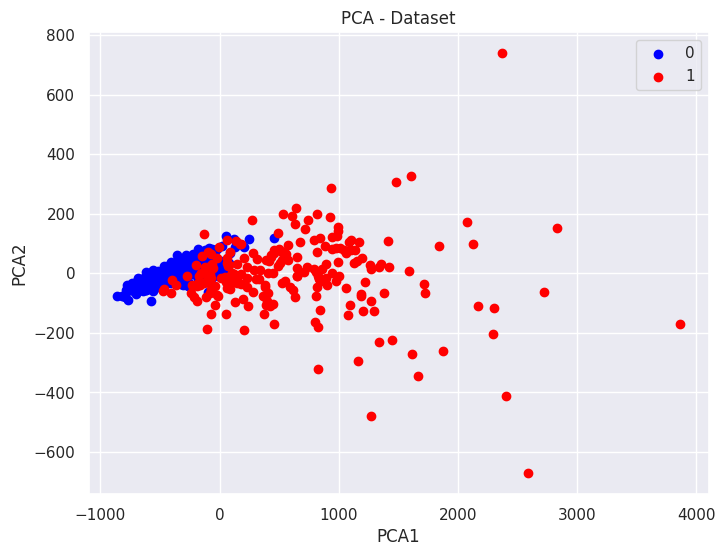

In [10]:
# Gráfico PCA:
plt.figure(figsize=(8,6))
diagnosis = [0, 1]
colores = ['blue', 'red']
for diagnostico, color in zip(diagnosis, colores):
  datos_diag = df_pca2['diagnosis'] == diagnostico
  plt.scatter(x = df_pca2.loc[datos_diag, 'pca1'],
              y = df_pca2.loc[datos_diag, 'pca2'],
              c = color,
              label = diagnostico)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA - Dataset')
plt.legend()
plt.show()

**Comentario:** Lamentablemente, 2 variables no son suficientes para separar los datos según el diagnostico. Por lo tanto, será necesario aplicar PCA con un número mayor de dimensiones. Dado que para mayor de 2 dimensiones perdemos la ventaja de poder graficar los datos, no aumentaremos en 1 la dimensión, sino que a 10.

In [11]:
# PCA:
pca10 = PCA(n_components=10)
resultados_pca = pca10.fit_transform(X)
df_pca10 = pd.DataFrame(data = resultados_pca,
                       columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10'],
                       index = df.index)
df_pca10['diagnosis'] = Y

df_pca10.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,diagnosis
id,,,,,,,,,,,
842302,1160.142574,-293.917544,48.578398,-8.711975,32.000486,1.265415,0.931337,0.148167,0.745463,0.589359,1
842517,1269.122443,15.630182,-35.394534,17.861283,-4.334874,-0.225872,-0.046037,0.200804,-0.485828,-0.084035,1
84300903,995.793889,39.156743,-1.709753,4.199340,-0.466529,-2.652811,-0.779745,-0.274026,-0.173874,-0.186994,1
84348301,-407.180803,-67.380320,8.672848,-11.759867,7.115461,1.299436,-1.267304,-0.060555,-0.330639,-0.144155,1
84358402,930.341180,189.340742,1.374801,8.499183,7.613289,1.021160,-0.335522,0.289109,0.036087,-0.138502,1


4. Aplique al menos tres modelos de clasificación distintos. Para cada uno de los modelos escogidos, realice una optimización de los hiperparámetros. Además, calcule las respectivas métricas. Concluya.

In [12]:
# Datos de entrenamiento - Datos de prueba:
X_pca = df_pca10.drop('diagnosis',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state = 2)

# Imprimir largo de los conjuntos de entrenamiento y testeo:
print('Separando informacion:\n')
print('numero de filas data original : ', len(X))
print('numero de filas train set     : ', len(X_train))
print('numero de filas test set      : ', len(X_test))

Separando informacion:

numero de filas data original :  569
numero de filas train set     :  455
numero de filas test set      :  114


In [13]:
# Instanciar modelos:
lr = LogisticRegression()
svc = SVC()
rfc = RandomForestClassifier()

### Optimización de parámetros: Logistic Regression

In [14]:
# Parámetros:
param_grid_lr = {'solver' : ['liblinear'],
                 'max_iter' : [1000],
                 'penalty' : ['l1', 'l2'],
                 'class_weight' : ['balanced', None]
                 }
param_grid_lr

{'solver': ['liblinear'],
 'max_iter': [1000],
 'penalty': ['l1', 'l2'],
 'class_weight': ['balanced', None]}

In [15]:
# Aplicar greed search:
gs = GridSearchCV(estimator = lr,
                  param_grid = param_grid_lr,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = -1)

gs = gs.fit(X_train, y_train)

In [16]:
# Imprimir resultados:
print(gs.best_score_)
print(gs.best_params_)

0.9494505494505494
{'class_weight': 'balanced', 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [17]:
# Utilizando el mejor modelo Logistic Regressor
mejor_modelo_lr = gs.best_estimator_
mejor_modelo_lr.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo_lr.score(X_test, y_test)))

Precisión: 0.939


**Comentario:** Se obtuvo muy buenos resultados.

### Optimización de parámetros: SVC

In [18]:
# Parámetros:
param_grid_svc = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                 'class_weight' : ['balanced', None]
                 }
param_grid_svc

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'class_weight': ['balanced', None]}

In [19]:
# Aplicar greed search
gs = GridSearchCV(estimator = svc,
                  param_grid = param_grid_svc,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = -1)

gs = gs.fit(X_train, y_train)

In [20]:
# Imprimir resultados:
print(gs.best_score_)
print(gs.best_params_)

0.9516483516483516
{'class_weight': 'balanced', 'kernel': 'linear'}


In [21]:
# Utilizando el mejor modelo SVC:
mejor_modelo_svc = gs.best_estimator_
mejor_modelo_svc.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo_svc.score(X_test, y_test)))

Precisión: 0.939


**Comentario:** Obtuvo la misma precisión que Logistic Regression.

### Optimización de parámetros: Random Forest Classifier

In [22]:
# Parámetros:
param_grid_rfc = {'max_depth': [None, 10, 20, 30],
                  'min_samples_leaf': [5, 8, 10],
                  'class_weight' : ['balanced', None]
                  }
param_grid_rfc

{'max_depth': [None, 10, 20, 30],
 'min_samples_leaf': [5, 8, 10],
 'class_weight': ['balanced', None]}

In [23]:
# Aplicar greed search:
gs = GridSearchCV(estimator = rfc,
                  param_grid = param_grid_rfc,
                  scoring = 'accuracy',
                  cv = 5,
                  n_jobs = -1)

gs = gs.fit(X_train, y_train)

In [24]:
# Imprimir resultados:
print(gs.best_score_)
print(gs.best_params_)

0.945054945054945
{'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 5}


In [25]:
# Utilizando el mejor Random Forest Classifier:
mejor_modelo_rfc = gs.best_estimator_
mejor_modelo_rfc.fit(X_train, y_train)
print('Precisión: {0:.3f}'.format(mejor_modelo_rfc.score(X_test, y_test)))

Precisión: 0.930


**Comentario:** Obtuvo muy buen rendimiento, pero menor respecto a los otros modelos.

### Conclusiones:


In [26]:
# Predicciones del modelo:
y_pred_lr = mejor_modelo_lr.predict(X_test)
y_pred_svc = mejor_modelo_svc.predict(X_test)
y_pred_rfc = mejor_modelo_rfc.predict(X_test)

# Métricas:

print('Accuracy:')
print('- Logistic Regression: {0:.3f}'.format(accuracy_score(y_test, y_pred_lr)))
print('- SVC:                 {0:.3f}'.format(accuracy_score(y_test, y_pred_svc)))
print('- RFC:                 {0:.3f}'.format(accuracy_score(y_test, y_pred_rfc)))
print('\n')

print('Precision:')
print('- Logistic Regression: {0:.3f}'.format(precision_score(y_test, y_pred_lr)))
print('- SVC:                 {0:.3f}'.format(precision_score(y_test, y_pred_svc)))
print('- SVC:                 {0:.3f}'.format(precision_score(y_test, y_pred_rfc)))
print('\n')

print('Recall:')
print('- Logistic Regression: {0:.3f}'.format(recall_score(y_test, y_pred_lr)))
print('- SVC:                 {0:.3f}'.format(recall_score(y_test, y_pred_svc)))
print('- SVC:                 {0:.3f}'.format(recall_score(y_test, y_pred_svc)))
print('\n')

print('F1 Score:')
print('- Logistic Regression: {0:.3f}'.format(f1_score(y_test, y_pred_lr)))
print('- SVC:                 {0:.3f}'.format(f1_score(y_test, y_pred_svc)))
print('- SVC:                 {0:.3f}'.format(f1_score(y_test, y_pred_svc)))
print('\n')

Accuracy:
- Logistic Regression: 0.939
- SVC:                 0.939
- RFC:                 0.930


Precision:
- Logistic Regression: 0.913
- SVC:                 0.913
- SVC:                 0.894


Recall:
- Logistic Regression: 0.933
- SVC:                 0.933
- SVC:                 0.933


F1 Score:
- Logistic Regression: 0.923
- SVC:                 0.923
- SVC:                 0.923




**Comentario:** En general, los modelos están muy parejos y presentan un muy buen rendimiento.

En base a la métrica 'accuracy' se realizó la elección entre sub-modelos al momento de optimizar hiperparámetros. Es por esto que tiene sentido que esta métrica es la que mejores resultados obtuvo respecto las otras.

Se observa un empate entre el modelo Linear Regression y SVC, y el modelo Random Forest Classifier con un rendimiento menor, pero igualmente excelente.

Típicamente (y este también fue el caso), el entrenamiento del SVC es más lento. Por lo tanto, para este caso se prefiere el modelo Linear Regression.